# HOLIDAY SEASON SALES PREDICTIONS

## Importing Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

## Importing data

In [102]:
train_data = pd.read_csv('train.csv')
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [103]:
test_data = pd.read_csv('test.csv')
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [104]:
train_data.shape

(550068, 12)

In [105]:
test_data.shape

(233599, 11)

## descriptive analysis

In [106]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [107]:
test_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


## Checking for Missing value using visualisation

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


<Axes: >

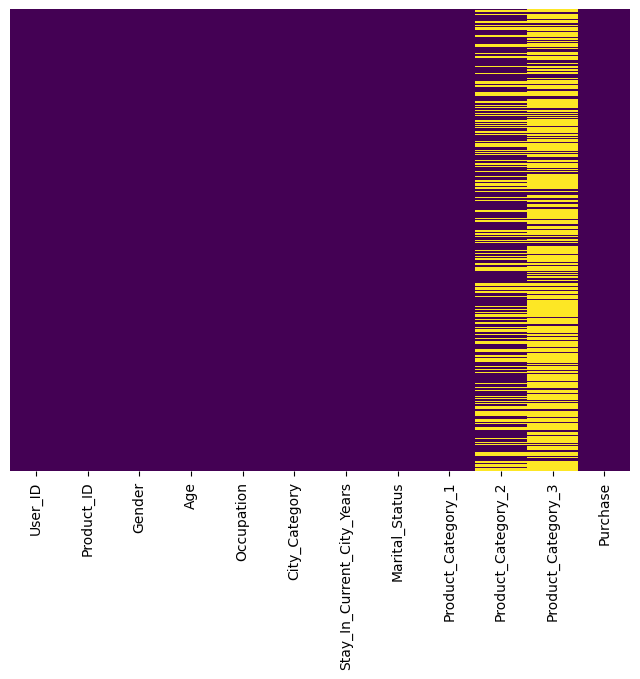

In [108]:
print(train_data.isnull().sum())
plt.figure(figsize=(8,6))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [109]:
train_data.isnull().sum()/train_data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64


<Axes: >

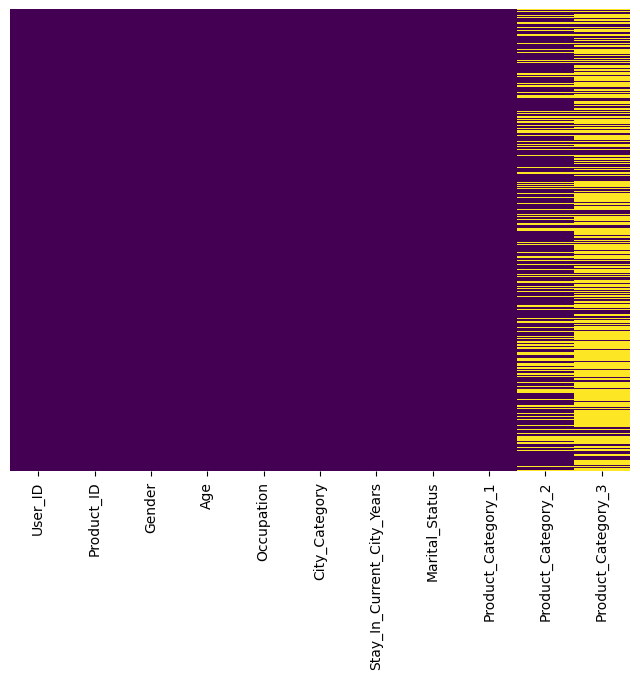

In [110]:
print(test_data.isnull().sum())

# to see missing value using visualisation
plt.figure(figsize=(8,6))
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [111]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Data Pre-processing

In [112]:
# Drop unnecessary columns
train_data = train_data.drop(['User_ID','Product_ID'], axis=1)
test_data = test_data.drop(['User_ID','Product_ID'], axis=1)

# Interpolate missing values in the train_data
train_data = train_data.interpolate()

# Interpolate missing values in the test_data 
test_data = test_data.interpolate()

# Handle non-finite values before converting to integers
train_data[['Product_Category_2', 'Product_Category_3']] = train_data[['Product_Category_2', 'Product_Category_3']].fillna(0).astype(int)
test_data[['Product_Category_2', 'Product_Category_3']] = test_data[['Product_Category_2', 'Product_Category_3']].fillna(0).astype(int)

# Display the first few rows of the train_data DataFrame
print(train_data.head())



  Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                   0                   0   
1               0                   1                   6                  14   
2               0                  12                  10                  14   
3               0                  12                  14                  15   
4               0                   8                   8                  15   

   Purchase  
0      8370  
1     15200  
2      1422  
3      1057  
4      7969  


In [113]:
# Display the test_data
print(test_data)

       Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
0           M  46-50           7             B                          2   
1           M  26-35          17             C                          0   
2           F  36-45           1             B                         4+   
3           F  36-45           1             B                         4+   
4           F  26-35           1             C                          1   
...       ...    ...         ...           ...                        ...   
233594      F  26-35          15             B                         4+   
233595      F  26-35          15             B                         4+   
233596      F  26-35          15             B                         4+   
233597      F  46-50           1             C                         4+   
233598      F  46-50           0             B                         4+   

        Marital_Status  Product_Category_1  Product_Category_2  \
0        

# Exploratory Data Analysis

### Target variable -- Purchase

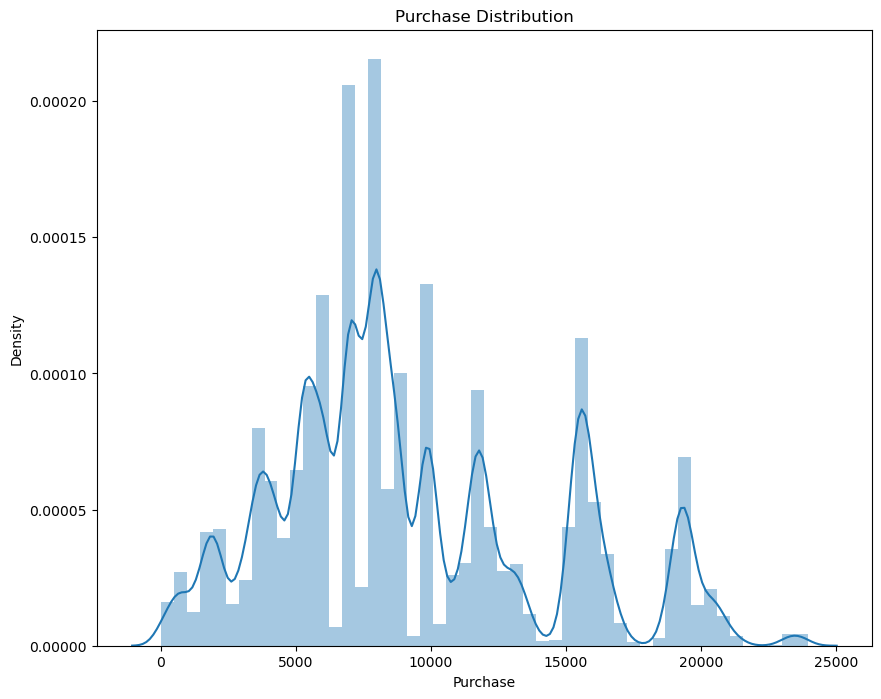

In [114]:
plt.figure(figsize=(10,8))
sns.distplot(train_data["Purchase"])
plt.title("Purchase Distribution")
plt.show()

In [115]:
##Many customers have the same purchase amount, which could be due to the high number of discounted products bought on Black Friday. This pattern seems to follow a Gaussian Distribution.

In [116]:
train_data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

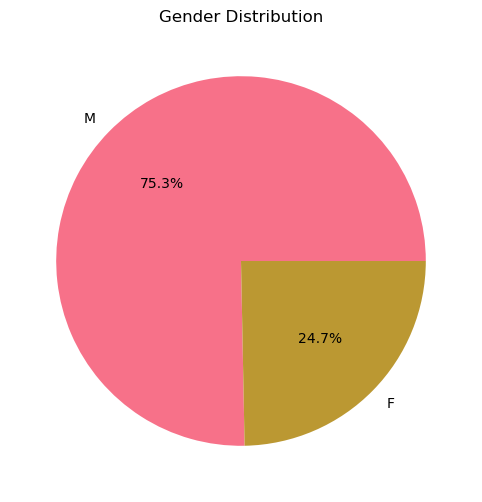

In [117]:
plt.figure(figsize=(8, 6))
gender_counts = train_data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('husl'))
plt.title('Gender Distribution')
plt.show()

In [118]:
##More transactions have been made by male customers compared to female customers.

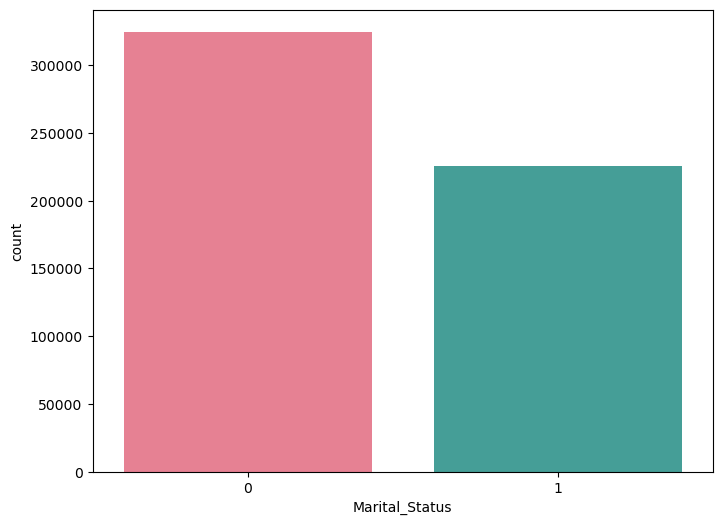

In [119]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Marital_Status', data = train_data, palette ='husl')
plt.show()

In [120]:
##In the dataset, there are a higher number of unmarried customers who buy more items during black friday sales.

In [121]:
train_data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

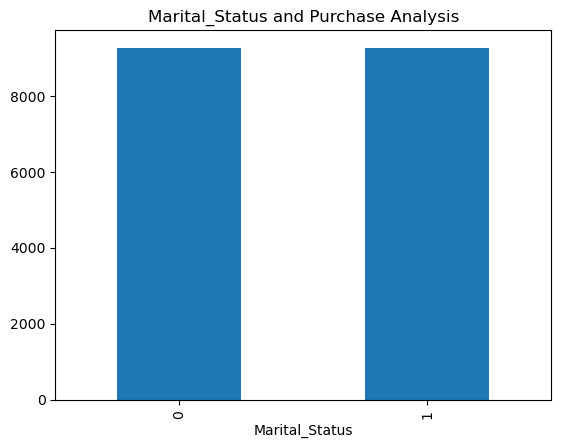

In [122]:
train_data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

In [123]:
#Based on the analysis above, we can conclude that the average purchase amount of married and unmarried customers is equal. 
#However, unmarried customers made more purchases compared to married customers.

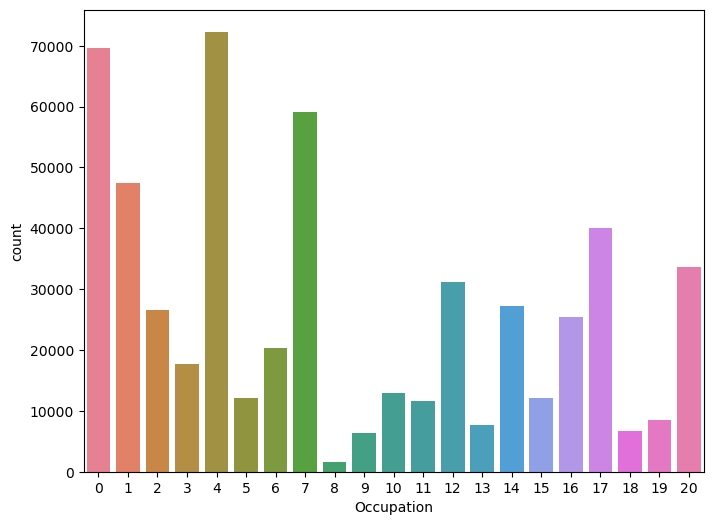

In [124]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Occupation', data = train_data, palette ='husl')
plt.show()

In [125]:
#Customers with occupations 0 and 4 have conducted a higher number of transactions during sales.

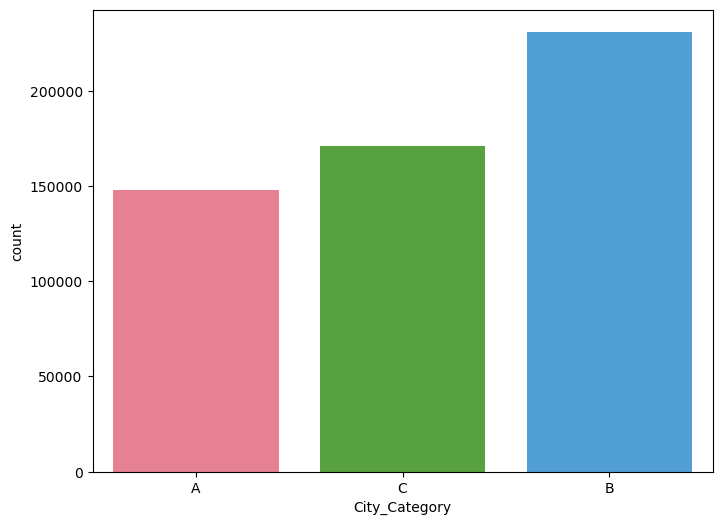

In [126]:
plt.figure(figsize=(8,6))
sns.countplot(x ='City_Category', data = train_data, palette ='husl')
plt.show()

In [127]:
##City category B has recorded the highest number of purchases, with category C coming in second.

In [128]:
train_data.groupby("City_Category").mean()["Purchase"]

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

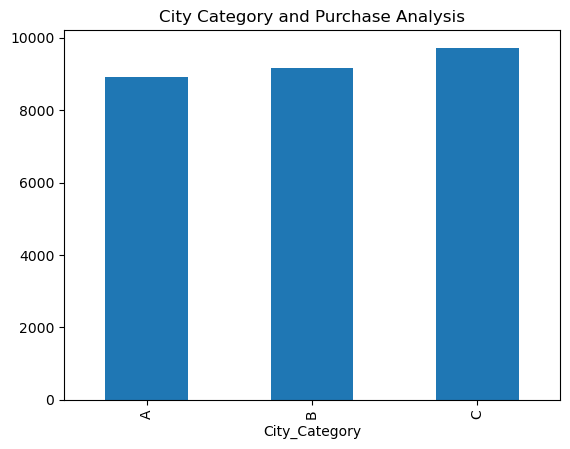

In [129]:
train_data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

In [130]:
##We observe that the customers from city C spends the most.

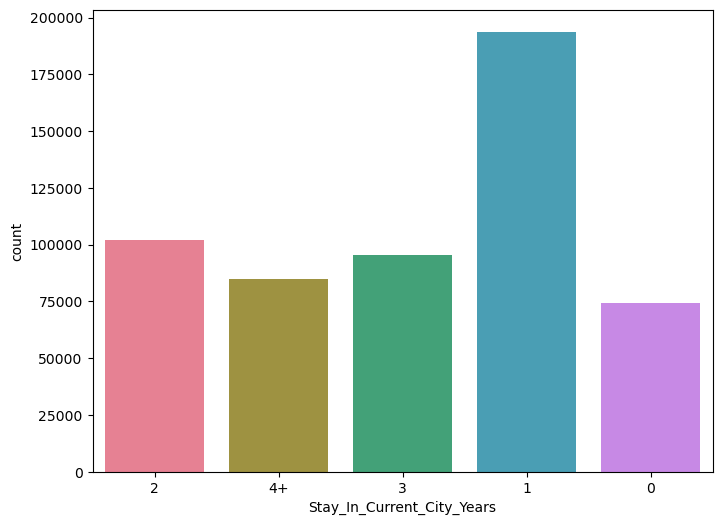

In [131]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Stay_In_Current_City_Years', data = train_data, palette ='husl')
plt.show()

In [132]:
#Customers who have been living in that city for a long time tend to buy fewer new things, while new customers in town are more inclined to make the most of the discounted prices during Black Friday Sales.

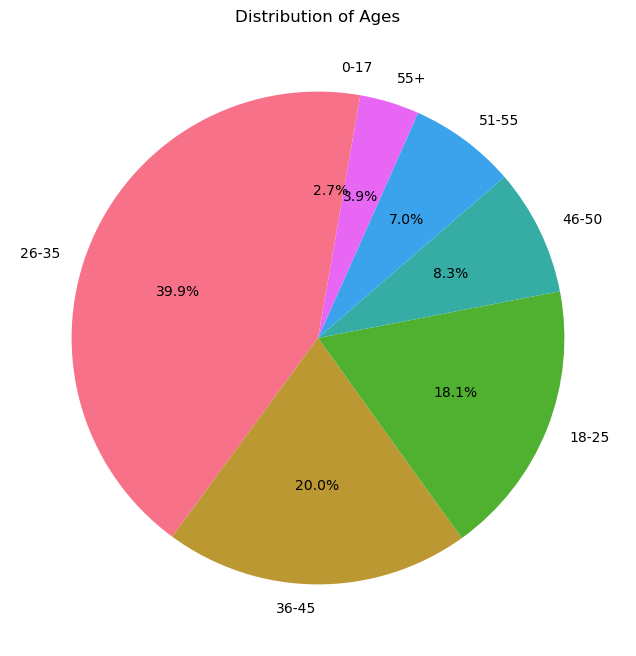

In [133]:
plt.figure(figsize=(8, 8))
age_counts = train_data['Age'].value_counts()
labels = age_counts.index
plt.pie(age_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('husl'))
plt.title('Distribution of Ages')
plt.show()

In [134]:
#We can see that the Age group (26-35) makes the most no. of purchases during holiday season sales.

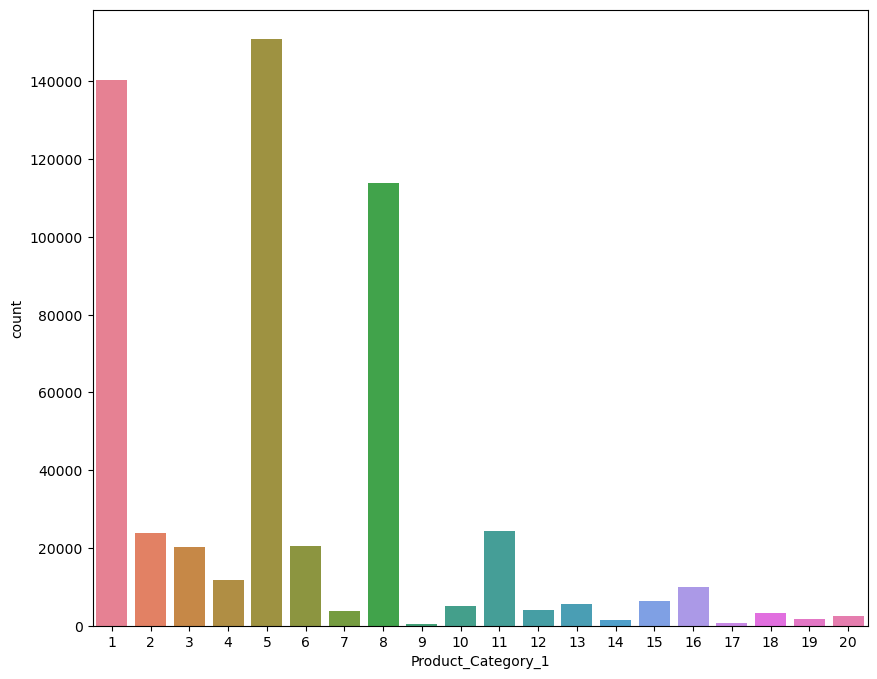

In [135]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Product_Category_1', data = train_data, palette ='husl')
plt.show()

In [136]:
#In terms of purchases, the numbers 1, 5, and 8 are the top performers in Product_Category_1.

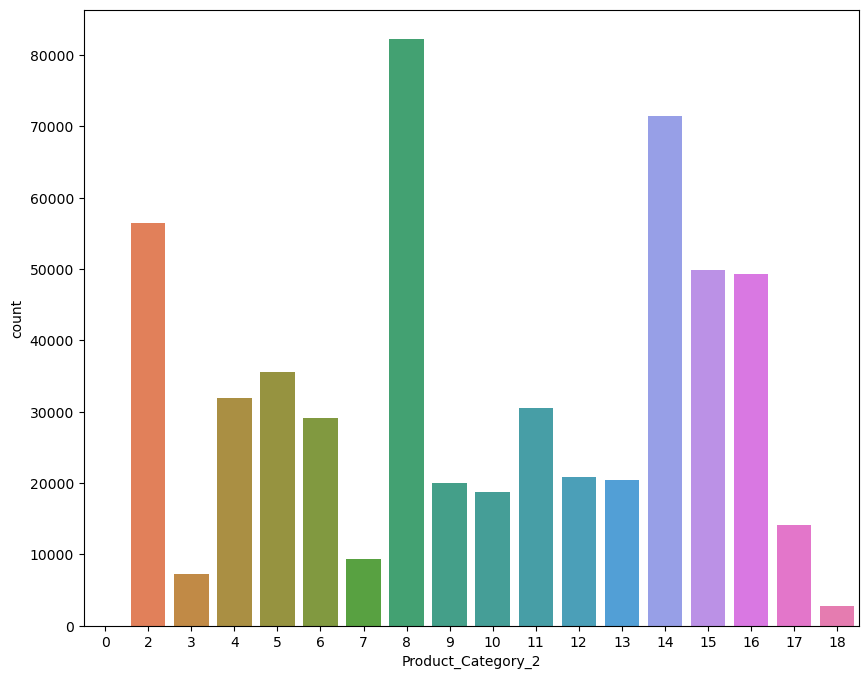

In [137]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Product_Category_2', data = train_data, palette ='husl')
plt.show()

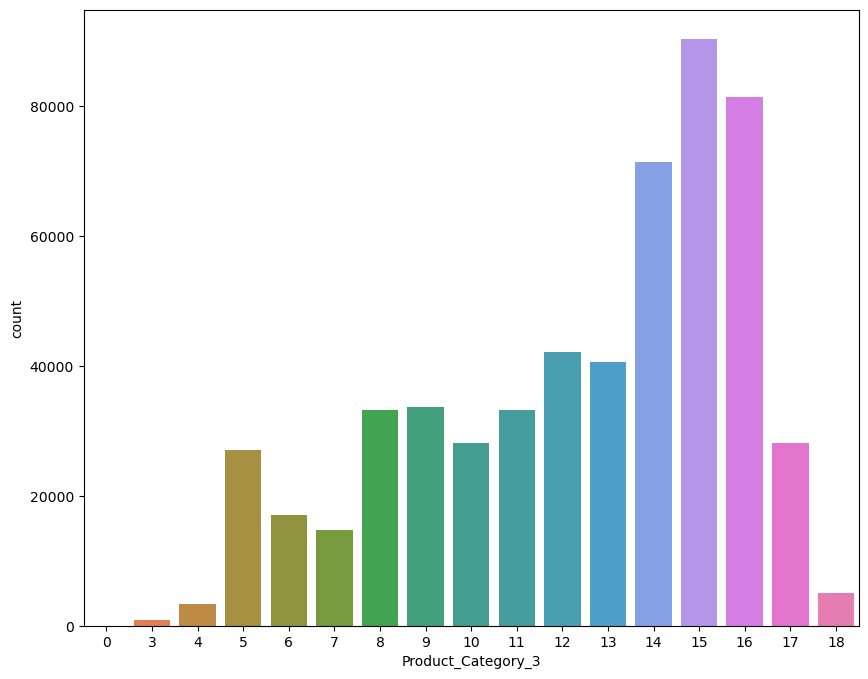

In [138]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Product_Category_3', data = train_data, palette ='husl')
plt.show()

## Correlation

In [139]:
train_data.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,-0.001042,0.007484,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.015076,0.015171,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.310119,0.045007,-0.343703
Product_Category_2,-0.001042,0.015076,0.310119,1.000000,0.251231,-0.136041
Product_Category_3,0.007484,0.015171,0.045007,0.251231,1.000000,0.022832
Purchase,0.020833,-0.000463,-0.343703,-0.136041,0.022832,1.000000


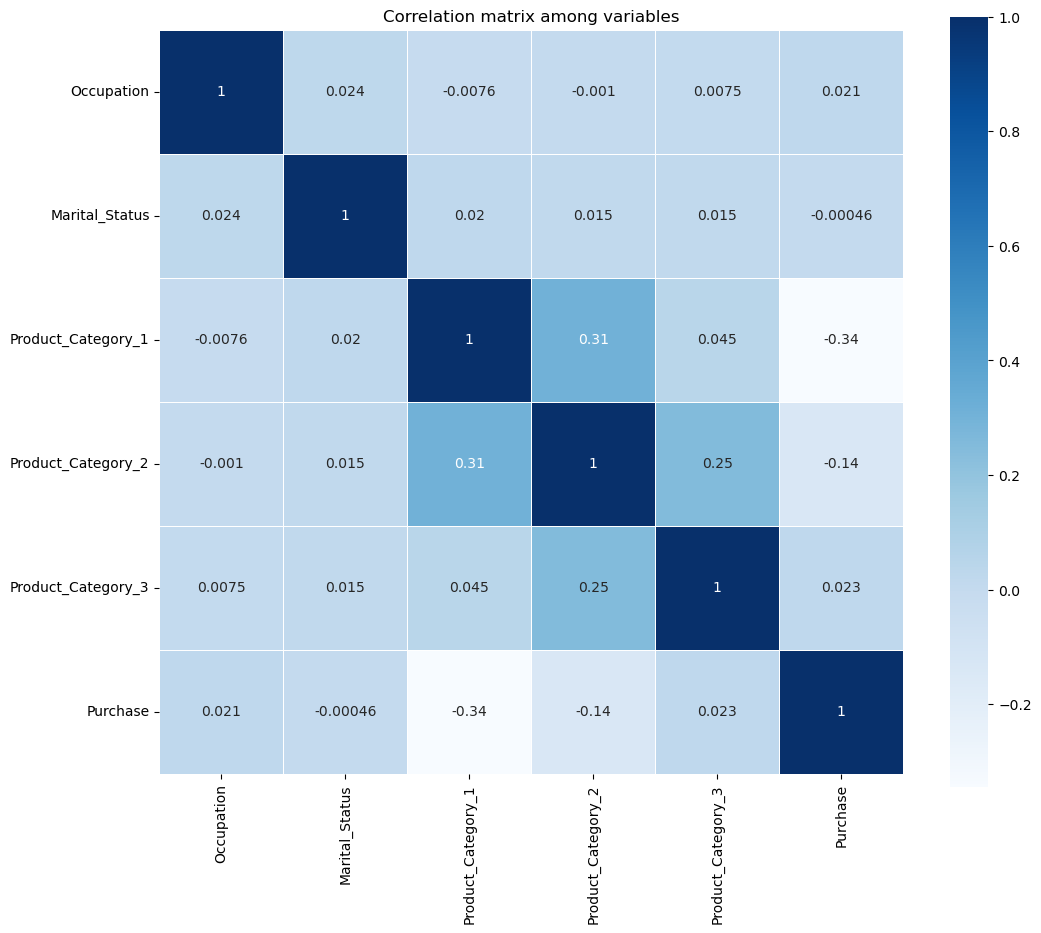

In [140]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(), square=True, annot=True, linewidths=.5, cmap="Blues")
plt.title("Correlation matrix among variables")
plt.show()

# Modelling using Machine Learning Algorithms

In [141]:
#Label Encoding for Categorical Variables
lr = LabelEncoder()
train_data['Gender'] = lr.fit_transform(train_data['Gender'])
train_data['Age'] = lr.fit_transform(train_data['Age'])
train_data['City_Category'] = lr.fit_transform(train_data['City_Category'])
train_data['Stay_In_Current_City_Years'] = train_data['Stay_In_Current_City_Years'].replace(to_replace="4+", value="4")

# Label Encoding for Test Data
test_data['Gender'] = lr.fit_transform(test_data['Gender'])
test_data['Age'] = lr.fit_transform(test_data['Age'])
test_data['City_Category'] = lr.fit_transform(test_data['City_Category'])
test_data['Stay_In_Current_City_Years'] = test_data['Stay_In_Current_City_Years'].replace(to_replace="4+", value="4")

In [142]:
#  Creating Independent and Dependent Data Sets
X = train_data.drop("Purchase", axis=1)
y = train_data['Purchase']
#Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#  Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [143]:
#feature Selection 
# Create an estimator 
estimator = LinearRegression()

# Initialize RFE without specifying the number of features
rfe = RFE(estimator)

# Fit RFE on the training data
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)

# Transform the test data
X_test_selected = rfe.transform(X_test_scaled)

# Access the ranking of features (the higher the rank, the weaker the feature)
feature_ranking = rfe.ranking_

# Create a DataFrame to display feature names and their corresponding ranks
feature_ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': feature_ranking})

# Display the DataFrame
print(feature_ranking_df)

# Get the indices of selected features
selected_feature_indices_rfe = rfe.get_support(indices=True)

# Get the names of selected features
selected_features_rfe = X.columns[selected_feature_indices_rfe]

# Display selected features
print("Selected Features:", selected_features_rfe)


                      Feature  Ranking
0                      Gender        2
1                         Age        3
2                  Occupation        4
3               City_Category        1
4  Stay_In_Current_City_Years        6
5              Marital_Status        5
6          Product_Category_1        1
7          Product_Category_2        1
8          Product_Category_3        1
Selected Features: Index(['City_Category', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3'],
      dtype='object')


In [144]:
#  Linear Regression to the Training set
regressor  = LinearRegression()
regressor .fit(X_train_scaled,y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test_scaled)
y_pred

# Decision Tree Regressor
dt= DecisionTreeRegressor(random_state = 0)  
dt.fit(X_train_scaled, y_train)

# Predicting
dt_y_pred = dt.predict(X_test_scaled)

# Random Forest Regressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train_scaled, y_train)

# Predicting
rf_y_pred = rfregressor.predict(X_test_scaled)

# XGBoost Regressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
xgb_reg.fit(X_train_scaled, y_train)

# Predicting
xgb_y_pred = xgb_reg.predict(X_test_scaled)

In [145]:
# Linear Regression
lr_max_error = max_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse=mean_squared_error(y_test, y_pred)
lr_r2=r2_score(y_test, y_pred)

# Decision Tree Regressor
dt_max_error = max_error(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse=mean_squared_error(y_test, dt_y_pred)
dt_r2=r2_score(y_test, dt_y_pred)

# Random Forest Regressor
rf_max_error = max_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse=mean_squared_error(y_test, rf_y_pred)
rf_r2=r2_score(y_test, rf_y_pred)

# XGBoost Regressor
xgb_max_error = max_error(y_test, xgb_y_pred)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse=mean_squared_error(y_test, xgb_y_pred)
xgb_r2=r2_score(y_test, xgb_y_pred)

# Print the results

print("Linear Regression Max Error:", lr_max_error)
print("Linear Regression MAE:", lr_mae)
print("Linear Regression MSE:", lr_mse)
print("Linear Regression r2 score:", lr_r2)
print("RMSE of Linear Regression Model on test data is ",sqrt(mean_squared_error(y_test, y_pred)))

print("\nDecision Tree Max Error:", dt_max_error)
print("Decision Tree MAE:", dt_mae)
print("Decision Tree MSE:", dt_mse)
print("Decision Tree r2 score:", dt_r2)
print("RMSE of Decision Tree Model on test data is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

print("\nRandom Forest Max Error:", rf_max_error)
print("Random Forest MAE:", rf_mae)
print("Random Forest MAE:", rf_mse)
print("Random Forest r2 score:", rf_r2)
print("RMSE of Random Forest Model on test data is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

print("\nXGBoost Max Error:", xgb_max_error)
print("XGBoost MAE:", xgb_mae)
print("XGBoost MSE:", xgb_mse)
print("XGBoost r2score:", xgb_r2)
print("RMSE of XGBoost Model on test data is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

Linear Regression Max Error: 17938.302893779743
Linear Regression MAE: 3596.2321555236344
Linear Regression MSE: 22015588.865803026
Linear Regression r2 score: 0.12744645790997844
RMSE of Linear Regression Model on test data is  4692.077244228086

Decision Tree Max Error: 19334.0
Decision Tree MAE: 2648.8928434908676
Decision Tree MSE: 13816722.018111177
Decision Tree r2 score: 0.4523957632719737
RMSE of Decision Tree Model on test data is  3717.0851507748885

Random Forest Max Error: 19114.4
Random Forest MAE: 2347.725051602469
Random Forest MAE: 10239540.951047923
Random Forest r2 score: 0.5941717579905033
RMSE of Random Forest Model on test data is  3199.9282727973646

XGBoost Max Error: 15634.24609375
XGBoost MAE: 2166.012405489927
XGBoost MSE: 8398408.910871582
XGBoost r2score: 0.6671421560526991
RMSE of XGBoost Model on test data is  2898.0008472862087


In [146]:
#The XGBoost Regressor model achieves the best RMSE value, maximum error, mean absolute error, and r2 score.
#RMSE: 2898.008
#r2 score: 0.66

In [147]:
# Model Selection
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=0),
    'XGBoost': XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
}

for model_name, model in models.items():
    # Cross-validation with explained variance as the scoring metric
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='explained_variance')
    
    #  results
    print(f'{model_name} Cross-Validation Explained Variance: {scores.mean()} (std: {scores.std()})')


Linear Regression Cross-Validation Explained Variance: 0.12449456658487128 (std: 0.0024423694125350927)
Decision Tree Cross-Validation Explained Variance: 0.644802549826655 (std: 0.001453169889671725)
Random Forest Cross-Validation Explained Variance: 0.6473435969248253 (std: 0.0016260825633728846)
XGBoost Cross-Validation Explained Variance: 0.6540889958690159 (std: 0.0012214227417269633)


In [148]:
#In terms of explained variance the XGBoost Regressor outperforms the Random Forest Regressor and the Decision Tree Regressor, which are also performing well.

In [149]:
# Extract the relevant features from test_data
test_data_selected = test_data[X_train.columns]

# Use the same scaler that was used to transform the training data
test_data_scaled = scaler.transform(test_data_selected)

# Using the trained XGBoost Regressor model for predictions
test_data_scaled = scaler.transform(test_data)  
predictions = xgb_reg.predict(test_data_scaled)


In [150]:
#Checking the predictions
predictions_df = pd.read_csv('predictions.csv')
print(predictions_df.head())


   Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0       1    4           7              1                           2   
1       1    2          17              2                           0   
2       0    3           1              1                           4   
3       0    3           1              1                           4   
4       0    2           1              2                           1   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               1                   1                  11                   0   
1               0                   3                   5                   0   
2               1                   5                  14                   0   
3               1                   4                   9                   0   
4               0                   4                   5                  12   

   Predicted_Purchase  
0          16586.6210  
1           9787.9070  
2 